# Priprema i deskriptivna analiza numeričkih podataka

>U ovoj svesci je prikazano kako se obrađuju brojčani podaci u tabelama. Za razliku od tekstualnih podataka, sa brojevima možemo da računamo i zato je veliki broj Pajton funkcija rezervisan za numeričke podatke. Treba obratiti pažnju da nisu svi brojčani podaci istog tipa i da funkcije mogu da budu osetljive na tu razliku. To što je nama "očigledno" koji je tip podataka u pitanju, ne mora da znači da su podaci do kraja čisti i da Pajton to prepoznaje.

Pajton, u svojim bibliotekama, ima mnoštvo funkcija za obradu i eksplorativnu analizu numeričkih podataka. Ukoliko je kolona u tabeli čista i ne sadrži ništa sem brojeva, najveći deo uvodnih analiza možemo da uradimo sa vrlo malo truda.

Da bismo na raspolaganju imali potrebne funkcije, učitaćemo na početku tri biblioteke: __pandas__ (za rad sa tabelama), __numpy__ (za rad sa numeričkim podacima) i __matplotlib.pyplot__ i __seaborn__ (za crtanje grafikona).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ukoliko nisu sve biblioteke instalirane, potrebno je da ih instalirate, npr. kao `pip install seaborn`.

Za potrebe vežbanja, učitaćemo jednu tabelu sa nacionalnog portala otvorenih podataka (Opštinski pokazatelji poslednje stanje) koja sadrži i tekstualne i brojčane podatke. Za slučaj da učitavanje preko interneta ne radi, učitaćemo je iz direktorijuma __/data__.

In [2]:
# df=pd.read_csv("https://data.gov.rs/sr/datasets/r/b1f1f94a-fe21-3a2a-b801-6f0f05b24257",sep=";")

In [3]:
opps=pd.read_csv("data/03IND01.csv",sep=";")

In [4]:
opps

,IDIndikator,Indikator,mes,god,idter,nter,vrednost,CreateDate,LastUpdate,IDLegenda,nIzvorI
0,IND00M01,Градоначелник/председник општине,1,2021,70017,Александровац,МИРКО МИХАЈЛОВИЋ,1/4/2021 7:39:27 AM,1/4/2021 7:39:27 AM,A,Републички завод за статистику (РЗС)
1,IND01G01,Површина (у км²),0,2020,70017,Александровац,387,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
2,IND01G02,Број становника - процена (последњи расположив...,0,2019,70017,Александровац,23898,7/1/2020 1:01:17 PM,7/1/2020 1:01:17 PM,A,Републички завод за статистику (РЗС)
3,IND01G03,Густина насељености (број становника / км2),0,2019,70017,Александровац,62,7/1/2020 1:01:17 PM,7/1/2020 1:01:17 PM,A,Републички завод за статистику (РЗС)
4,IND01G04,Број насеља,0,2020,70017,Александровац,55,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички завод за статистику (РЗС)
...,...,...,...,...,...,...,...,...,...,...,...
13241,IND02M55,Вредност извоза у УСД,11,2020,89010,Град Нови Сад,163079592.279077,12/30/2020 1:45:56 PM,12/30/2020 1:45:56 PM,P,Управа царине и Електро мрежа Србије (УЦ и ЕМС)
13242,IND02M56,Вредност извоза у ЕУР,11,2020,89010,Град Нови Сад,192545516.285837,12/30/2020 1:45:56 PM,12/30/2020 1:45:56 PM,P,Управа царине и Електро мрежа Србије (УЦ и ЕМС)
13243,IND03M03,Број регистрованих незапослених,12,2020,89010,Град Нови Сад,13015,1/14/2021 3:42:52 PM,1/14/2021 3:42:52 PM,A,Национална служба за запошљавање (НСЗ)
13244,IND03M08,"Просечна нето зарада за месец, према општини п...",11,2020,89010,Град Нови Сад,69238,1/19/2021 12:27:15 PM,1/25/2021 12:00:17 PM,A,Републички завод за статистику (РЗС)


Evidentno, u tabeli imamo različite indikatore (pokazatelje) po opštinama i godinama koji su raspoređeni na način koji nije najzgodniji. Ova ogromna tabela (ima 13246 redova) izgleda kao kolekcija istih tabela za pojedinačne indikatore. Vidimo da tu, na primer, postoji indikator Površina (u km²), ali taj podatak ne može lako da se obradi jer su vrednosti tog indikatora stavljene u kolonu __vrednost__ sa mnoštvom drugih podataka različitog tipa. Kada bismo hteli da nađemo ukupnu površinu svih opština, to ne može bez dodatne obrade podataka.

Da pogledamo za početak, koje tipove podataka ovde imamo. 

In [5]:
opps.dtypes

IDIndikator    object
Indikator      object
mes             int64
god             int64
idter           int64
nter           object
vrednost       object
CreateDate     object
LastUpdate     object
IDLegenda      object
nIzvorI        object
dtype: object

Mesec, godina i matični broj opštine su tipa integer, dok su svi ostali složeni. Da bismo išta mogli da analiziramo, moraćemo da izdvojimo pod-tabele za konkretne pokazatelje. Koje pokazatelje ovde uopšte imamo videćemo korišćenjem funkcije `unique()` za podatke u koloni __Indikator__.

In [6]:
opps['Indikator'].unique()

array(['Градоначелник/председник општине', 'Површина (у км²)',
       'Број становника - процена (последњи расположив податак за годину)',
       'Густина насељености (број становника / км2)', 'Број насеља',
       'Број живорођених',
       'Степен развијености ЈЛС према Закону о регионалном развоју',
       'Степен развијености е-управе', 'Укупна дужина водоводне мреже',
       'Број становника према Попису 2011',
       'Број домаћинстава према Попису 2011',
       'Укупна дужина канализационе мреже', 'Број великих предузећа ',
       'Број средњих предузећа ', 'Број малих предузећа ',
       'Број микро предузећа', 'Број без ознаке за величину',
       'Број активних привредних друштава',
       'Број активних привредних друштава по NACE Rev.2  (сектор A)',
       'Број активних привредних друштава по NACE Rev.2  (сектор B)',
       'Број активних привредних друштава по NACE Rev.2  (сектор C)',
       'Број активних привредних друштава по NACE Rev.2  (сектор D)',
       'Број актив

## Jednodimenzionalni skupovi podataka

Za jednostavne analize je dovoljno da izvučemo samo jedan indikator koji nas interesuje. Primera radi, sada ćemo izvući samo indikator vezan za površinu opštine.

In [7]:
povrsina=opps[opps['Indikator']=='Површина (у км²)']

In [8]:
povrsina.head()

,IDIndikator,Indikator,mes,god,idter,nter,vrednost,CreateDate,LastUpdate,IDLegenda,nIzvorI
1,IND01G01,Површина (у км²),0,2020,70017,Александровац,387,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
77,IND01G01,Површина (у км²),0,2020,70025,Алексинац,707,1/27/2021 10:15:40 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
153,IND01G01,Површина (у км²),0,2020,70033,Аранђеловац,376,1/27/2021 10:15:40 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
229,IND01G01,Површина (у км²),0,2020,70041,Ариље,349,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
305,IND01G01,Површина (у км²),0,2020,70050,Бабушница,529,1/27/2021 10:15:40 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)


Izgleda da su sada u koloni __vrednost__ samo brojevi. Možemo onda da ih saberemo i vidimo kolika je površina svih opština u Srbiji zajedno.

In [9]:
povrsina['vrednost'].sum()

'38770737634952967313651721314833003115038333941410451301427151573063842648288565716064619052493453443383663086022393253678366234831212647602141069109062941312023582578351530342854952721186337102561245427935693218426952419332910905817423195426551232374426264553827759289216670366470326497105948442152562864735737044874212428745631264763679755146288141182117101032582032345964778606672276023803675905961583531844868004005251327385230399782419730481181273609305610203411756489383582294523121628476251350100717026137632168789699'

Ups! Ovo nismo očekivali. Umesto sume brojeva, dobili smo sumu stringova, tj. spojene vrednosti svih stringova u koloni __vrednost__ od '387', '707' pa redom. Izgleda da Pajton i dalje ne zna da su u koloni __vrednost__ brojevi.

In [10]:
povrsina.dtypes

IDIndikator    object
Indikator      object
mes             int64
god             int64
idter           int64
nter           object
vrednost       object
CreateDate     object
LastUpdate     object
IDLegenda      object
nIzvorI        object
dtype: object

Da, Pajton je zadržao tip promenljive koji smo imali u originalnoj tabeli. To treba da promenimo pomoću funkcije `astype()`. Tako ćemo Pajtonu objasniti da podaci u koloni __vrednost__ treba da budu tipa _float_.

In [11]:
povrsina = povrsina.astype({'vrednost':float})

In [12]:
povrsina.dtypes

IDIndikator     object
Indikator       object
mes              int64
god              int64
idter            int64
nter            object
vrednost       float64
CreateDate      object
LastUpdate      object
IDLegenda       object
nIzvorI         object
dtype: object

In [13]:
povrsina['vrednost'].sum()

84122.0

Ovo deluje u redu. Tolika je površina Srbije.

Sada ćemo obraditi jedan drugi numerički indikator, prosečnu neto zaradu. Taj indikator se zove tačno __Prosečna neto zarada za mesec, prema opštini prebivališta zaposlenih__.

In [14]:
neto_zarada=opps[opps['Indikator']=='Просечна нето зарада за месец, према општини пребивалишта запослених']

S obzirom da nam za numeričku analizu tabele __neto_zarada__ nisu potrebne sve kolone, zadržaćemo samo tri. Matični broj zadržavamo samo zbog kontrole.

In [15]:
neto_zarada=neto_zarada[['idter','nter','vrednost']]

In [16]:
neto_zarada = neto_zarada.astype({'vrednost':float})

Ako želimo da vidimo gde su u Srbiji prosečne zarade najveće, potrebno je da sortiramo tabelu prema vrednosti. Sortiranje ne menja vrednosti u tabeli već nam prikazuje podatke na način koji nama odgovara.

In [17]:
neto_zarada.sort_values('vrednost',ascending=False).head(10)

,idter,nter,vrednost
832,70114,Врачар,99052.0
1282,70181,Нови Београд,96326.0
1730,70246,Стари град,96010.0
1580,70220,Савски венац,88020.0
756,70106,Вождовац,79008.0
982,70149,Звездара,78229.0
9384,79014,Град Београд,75649.0
1132,70165,Лазаревац,72684.0
1804,70254,Чукарица,72669.0
9161,71340,Костолац,70934.0


Najveće zarade su, očigledno, u Beogradu. Prva opština na ovoj listi koja nije beogradska je Kostolac.

Kada bismo pomoću funkcije `max()` tražili opštinu sa najvećim zaradama, to bi izgledalo ovako:

In [18]:
neto_zarada[neto_zarada.vrednost==neto_zarada.vrednost.max()]

,idter,nter,vrednost
832,70114,Врачар,99052.0


Funkciju `max()` možemo da primenimo i na celu tabelu, ali će nam tad izlaz biti niz maksimalnih vrednosti po kolonama. To nam sad nije posebno korisno. Primetite da maksimum za numeričke i tekstualne vrednosti radi drugačije. U prvom slučaju traži najveću vrednost, a u drugom podatke poređa leksikografski pa prikaže poslednji u nizu.

In [19]:
neto_zarada.max()

idter         89010
nter            Шид
vrednost    99052.0
dtype: object

Ako ceo niz brojeva zbog skraćenog prikaza ili komunikacije moramo da svedemo na jedan broj, onda je najbolje uzeti jednu od mera proseka: srednju vrednost ili medijanu. Maksimalna ili minimalna vrednost zarada su kurioziteti i ne govore nam mnogo o celom skupu. Srednja vrednost nam više govori o tome kolike su zarade u Srbiji dajući nam aritmetičku sredinu. Medijana nam daje prosek na malo drugačiji podatak, ona nam daje tipičnu vrednost zarade, odnosno koliku zaradu imaju oni koji su na sredini liste o visini zarade. Kod simetričnih raspodela podataka, srednja vrednost i medijana se poklapaju, ali raspodela zarada nije takva. Uvek ima više onih sa malim zaradama i nekoliko onih sa veoma velikim. To se vrlo često zloupotrebljava. Većina ljudi ima manje zarade od srednje vrednosti. Kad god je novac u pitanju, srednja vrednost bude veća od medijane. 

Pajton nema funkciju za srednju vrednost u osnovnom okruženju pa je potrebno učitati biblioteku __statistics__ da bismo imali funkciju `mean()`. Srećom, srednja vrednost se lako računa -- samo treba podeliti zbir svih elemenata sa njihovim brojem. (Ako vam je lakše učitajte biblioteku pa koristite _mean_.)

In [20]:
neto_zarada['vrednost'].sum()/neto_zarada['vrednost'].size

52942.137142857144

In [21]:
neto_zarada.vrednost.median()

50655.0

Vidimo da srednja vrednost prosečne neto zarade po opštinama za više od dve hiljade dinara veća nego medijana.

### Deskriptivna analiza

Rekli smo ranije da se u ovom kursu nećemo baviti (ozbiljnom) analizom podataka jer ona podrazumeva stručno, domensko znanje. Deskriptivna analiza je više deskripcija nego analiza. Nju računar radi po algoritmu i prikazuje nam mere centralne tendencije i mere rastura za određeni skup podataka. Taj deo posla ne zahteva bilo kakvo domensko znanje. Tumačenje mera koje nam daje deskriptivna analiza je već nešto drugo.

Deskriptivna analiza daje glavne mere jednog skupa brojčanih podataka kao što su broj elemenata (__count__), srednja vrednost (__mean__), standardna devijacija (__std__), minimum (__min__) itd. Iako sve ove mere možemo da dobijemo i direktno, zgodno je da ih jednom funkcijom dobijemo sve. Funkcija `describe()` to omogućava. 

![](.\data\deskriptivna2.png "decribe")

In [22]:
neto_zarada.vrednost.describe()

count      175.000000
mean     52942.137143
std       9576.694515
min      41851.000000
25%      47292.000000
50%      50655.000000
75%      54687.000000
max      99052.000000
Name: vrednost, dtype: float64

Po svemu sudeći, raspodela vrednosti iz ove kolone nije baš simetrična pa bi bilo dobro da je vizuelizujemo, tj. da prikažemo grafički. Zbog toga smo na početku učitavali biblioteku za crtanje. Analizu podataka je, po pravilu, lakše uraditi ako "vidimo" podatke. Zato se numerička analiza i vizuelizacija podataka obično rade istovremeno.

Za vizuelizaciju jednodimenzionalnog skupa podataka (niza, liste ili kolone u tabeli) najčešće se koristi histogram koji nam prikazuje broj elemenata u određenim intervalima, odnosno raspodelu podataka. Histograme crtamo pomoću funkcije `hist()`. Argument ove funkcije, sem niza čije brojeve hoćemo da prikažemo, jeste i opseg brojeva u kom posmatramo histogram sa korakom (veličinom intervala). Pomoću funkcije `axvline()` iz biblioteke __matplotlib.pyplot__ crtamo vertikalne linije određene boje, debljine i stila. Ovde ćemo nacrtati dve vertikalne linije: narandžastu za medijanu niza i crvenu za srednju vrednost.

Primetite da smo funkcije `median()` i `mean()` preuzeli iz __numpy__ biblioteke.

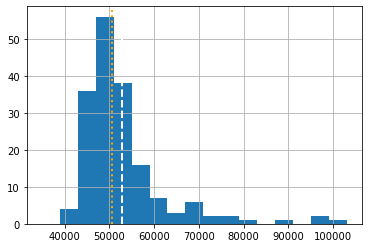

In [23]:
y=neto_zarada.vrednost
y.hist(bins=range(35000,105000,4000))
plt.axvline(x=np.median(y), color='orange', linewidth=2, linestyle=":")
plt.axvline(x=np.mean(y), color='white', linewidth=2, linestyle="--")

Slično, možemo da koristimo funkciju `hist()` i iz biblioteke za crtanje. Razlike u načinu prikazivanja nisu velike.

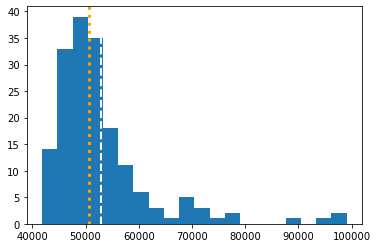

In [24]:
plt.hist(y,bins=20)
plt.axvline(x=np.median(y), color='orange', linewidth=3, linestyle=":")
plt.axvline(x=np.mean(y), color='white', linewidth=2, linestyle="--")

Grafičko prikazivanje raspodele podataka je, verovatno, najbolji način da razumemo šta se u tom skupu nalazi, da li je raspodela uniformna ili ima "repove", gde su tačke nagomilavanja, da li ima "nemogućih vrednosti" itd. Vrlo često je vizuelizacija podatka deo procesa čišćenja podataka. Mnogo je lakše uočiti nelogičnosti u velikom skupu podataka ako uspemo da ga dobro prikažemo grafički.

## Pivotiranje tabele

Tabela koju smo na početku učitali ima 175 redova koji se odnose na bilo koji indikator. Ako isecamo samo one redove koje nas u tom trenutku interesuju, izgubićemo sve ostale. Možda bi bilo bolje da transformišemo tabelu __opps__ tako da po redovima budu opštine, a po kolonama indikatori. To se zove pivotiranje tabele.

Zapravo, uzećemo i matični broj i naziv opštine po redovima zbog kontrole. Nikad ne znate da li će se u listi pojaviti dve opštine sa istim imenom, npr. Palilula. Zato je dobro da uvek imamo i jedinstveni matični broj. Ta dva naziva kolona ćemo staviti u listu i pridružiti argumentu __index__. Argumentu __columns__ ćemo pridružiti sve različite vrednosti koje postoje u koloni __vrednost__, a argumentu __values__ ćemo pridružiti vrednosti iz kolone koja se baš tako zove, __vrednost__. Pivotiranje tabele sada radimo pomoću funkcije `pivot()`.

In [25]:
pivopps=opps.pivot(index=['idter','nter'], columns='Indikator', values='vrednost')

In [26]:
pivopps

,Indikator,Број активних предузетника,Број активних предузетника по NACE Rev.2 (сектор A),Број активних предузетника по NACE Rev.2 (сектор B),Број активних предузетника по NACE Rev.2 (сектор C),Број активних предузетника по NACE Rev.2 (сектор D),Број активних предузетника по NACE Rev.2 (сектор E),Број активних предузетника по NACE Rev.2 (сектор F),Број активних предузетника по NACE Rev.2 (сектор G),Број активних предузетника по NACE Rev.2 (сектор H),Број активних предузетника по NACE Rev.2 (сектор I),...,Вредност извоза у УСД,Градоначелник/председник општине,Густина насељености (број становника / км2),Површина (у км²),"Просечна нето зарада за месец, према општини пребивалишта запослених","Просечна нето зарада за период јануар-текући месец, према општини пребивалишта запослених",Степен развијености ЈЛС према Закону о регионалном развоју,Степен развијености е-управе,Укупна дужина водоводне мреже,Укупна дужина канализационе мреже
idter,nter,,,,,,,,,,,,,,,,,,,,,
70017,Александровац,1021,22,1,325,0,0,118,225,45,79,...,1893655.65059975,МИРКО МИХАЈЛОВИЋ,62,387,44615,45383,II група,0.309491409041355,199,51
70025,Алексинац,1320,22,4,232,1,8,126,354,156,102,...,9850106.09590895,ДАЛИБОР РАДИЧЕВИЋ,67,707,49394,47896,IV група,0.313142788382875,205,43
70033,Аранђеловац,1828,12,1,336,1,4,240,361,165,181,...,9682257.53441178,БОЈАН РАДОВИЋ,115,376,53319,52354,II група,0.424362734010375,464,182
70041,Ариље,898,7,0,315,0,3,71,150,79,85,...,6754621.8552789,ПРЕДРАГ МАСЛАР,51,349,44510,43791,II група,0.355725723285914,459,68
70050,Бабушница,287,5,0,46,0,0,50,78,25,24,...,915210.700355534,ИВАНА СТОЈИЧИЋ,19,529,47249,46951,IV група - девастирано подручје,0.24716560533865,112,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80462,Врбас,1206,12,0,185,0,5,138,221,188,131,...,4534537.72750178,ПРЕДРАГ РОЈЕВИЋ,104,376,52544,50305,I група,0.462009050383169,232,84
80489,Чока,167,0,0,28,0,0,16,45,12,16,...,629137.305081099,СТАНА ЂЕМБЕР,32,321,49356,48447,III група,0.380526017239722,186,29
80497,Шид,795,18,0,117,0,3,55,199,92,87,...,5150027.81529499,ЗОРАН СЕМЕНОВИЋ,45,687,49784,48868,III група,0.451184243662082,209,67


Primetite kako u tabeli nema onih kolona __IDIndikator__, __mes__, __god__ itd. Kada smo "razapinjali" pivot-tabelu rekli smo šta hoćemo po redovima, a šta po kolonama. Te zaboravljene kolone nismo pominjali. Nisu nam sad ni potrebne.

In [27]:
pivopps.columns

Index(['Број активних предузетника',
       'Број активних предузетника по NACE Rev.2  (сектор A)',
       'Број активних предузетника по NACE Rev.2  (сектор B)',
       'Број активних предузетника по NACE Rev.2  (сектор C)',
       'Број активних предузетника по NACE Rev.2  (сектор D)',
       'Број активних предузетника по NACE Rev.2  (сектор E)',
       'Број активних предузетника по NACE Rev.2  (сектор F)',
       'Број активних предузетника по NACE Rev.2  (сектор G)',
       'Број активних предузетника по NACE Rev.2  (сектор H)',
       'Број активних предузетника по NACE Rev.2  (сектор I)',
       'Број активних предузетника по NACE Rev.2  (сектор J)',
       'Број активних предузетника по NACE Rev.2  (сектор K)',
       'Број активних предузетника по NACE Rev.2  (сектор L)',
       'Број активних предузетника по NACE Rev.2  (сектор M)',
       'Број активних предузетника по NACE Rev.2  (сектор N)',
       'Број активних предузетника по NACE Rev.2  (сектор O)',
       'Број актив

Sada možemo da promenimo tip promenljivih u tabeli. Jedan od načina da to uradimo je da navedemo tačno kojim kolonama hoćemo da promenimo tip podataka i da navedemo koji to tip treba da bude. Ovde ćemo izabrati tri kolone koje ćemo ubuduće tretirati kao numeričke.

In [28]:
pivopps=pivopps.astype({'Број регистрованих незапослених ': 'float',
                        'Број становника - процена (последњи расположив податак за годину)': 'float',
                        'Просечна нето зарада за месец, према општини пребивалишта запослених': 'float'})

Pivot-tabela nam daje višedimenzionalni skup podataka gde analiza može da bude proizvoljno složena. Mi se nećemo upuštati u analizu već ćemo samo dati primere dva tipa grafičkog prikaza ovih podataka. U jednom primeru ćemo videti kako izgleda zavisnost numeričke vrednosti od kategorijalne, a u drugom numeričke od numeričke.

In [29]:
df=pivopps[['Степен развијености ЈЛС према Закону о регионалном развоју',
         'Просечна нето зарада за месец, према општини пребивалишта запослених']]

Koristeći biblioteku __seaborn__ i funkciju `displot()` probaćemo da prikažemo malo složeniji, semitransparentni histogram gde svaka boja označava jedan od pet stepeni razvijenosti jedinice lokalne samouprave. Ovde nećemo ulaziti u detalje funkcije i njene argumente.

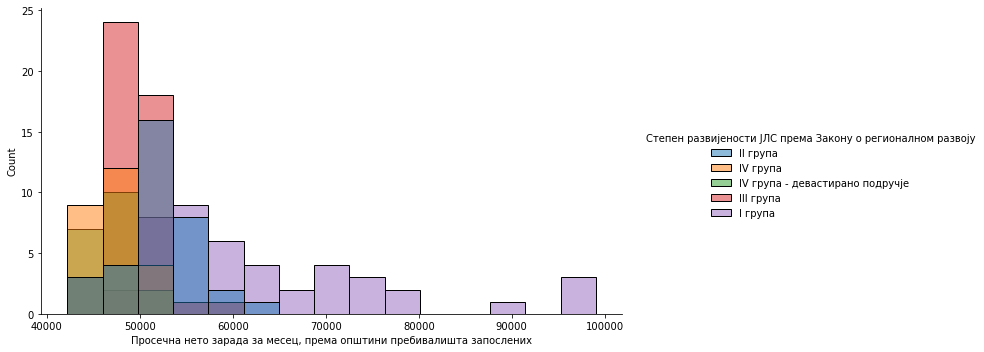

In [30]:
sns.displot(
  data=df,
  x="Просечна нето зарада за месец, према општини пребивалишта запослених",
  hue="Степен развијености ЈЛС према Закону о регионалном развоју",
  kind="hist",
  aspect=1.8,
  bins=15
)

Ono što vidimo sa histograma je da su opštine sa najvećim prihodom upravo one najrazvijenije, a da u donjem delu rang-liste ima najviše opština iz treće grupe. Takođe, vidimo i da redosled grupa u legendi nije baš smislen. Probajte to da sredite samostalno, npr. koristeći parametar `hue_order`.

Koristeći istu funkciju, umesto pet histograma koji se preklapaju možemo da nacrtamo pet histograma jedan pored drugog. To će možda biti preglednije.

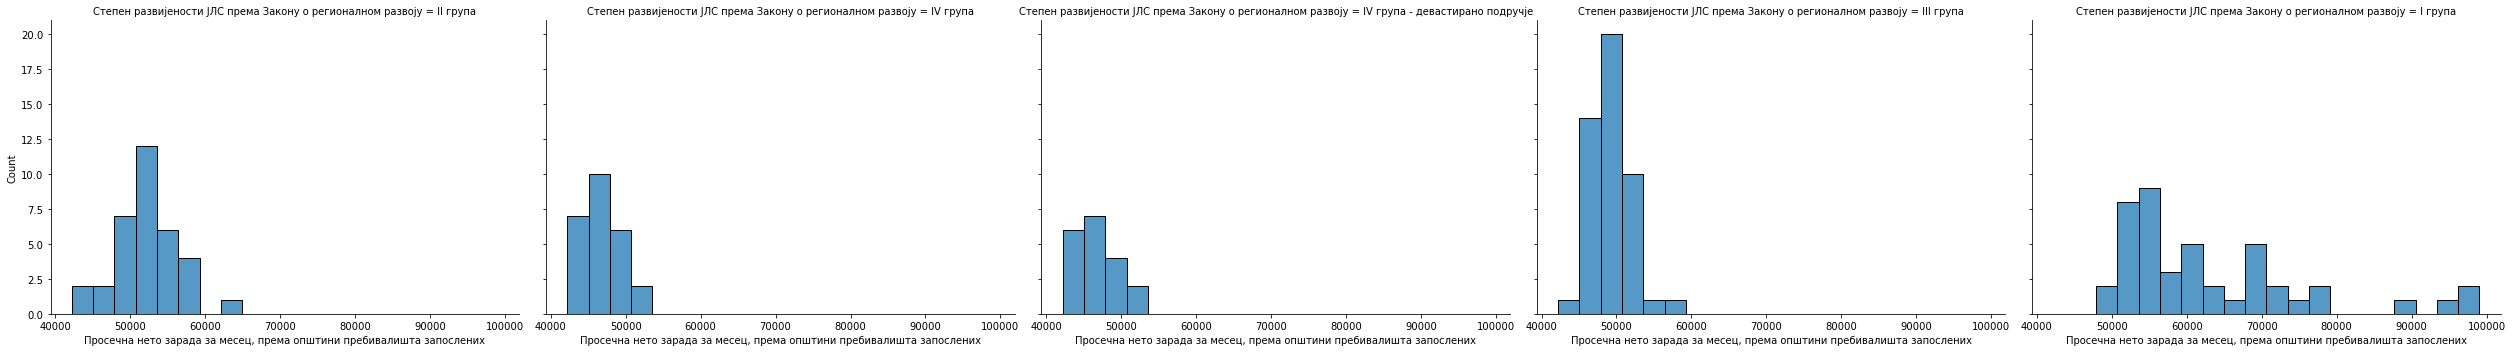

In [31]:
sns.displot(
  data=df,
  x="Просечна нето зарада за месец, према општини пребивалишта запослених",
  col="Степен развијености ЈЛС према Закону о регионалном развоју",
  kind="hist",
  aspect=1.4,
  bins=20
);

Nema sumnje da su slova na ovom grafikonu previše mala, ali to nije naročit problem. Ovi grafikoni su slika na html strani. Možemo tu sliku da otvorimo u novom tabu brauzera (desni klik na sliku pa _Open Image in New Tab_) da bismo je posle uvećali i pažljivo proučili. Dalje sređivanje i analizu ovih slika prepuštamo vama. 

Drugi način prikaza koji smo ovde hteli da demonstriramo je običan _scatter plot_. Primera radi, prikazaćemo pomoću funkcije `replot()` u kakvoj su vezi prosečna zarada i procenat nezaposlenih u opštini. Podatak o procentu nezaposlenih nemamo. Moraćemo prvo da ga izračunamo.

In [32]:
pivopps['Проценат незапослених']=pivopps['Број регистрованих незапослених ']/pivopps['Број становника - процена (последњи расположив податак за годину)']

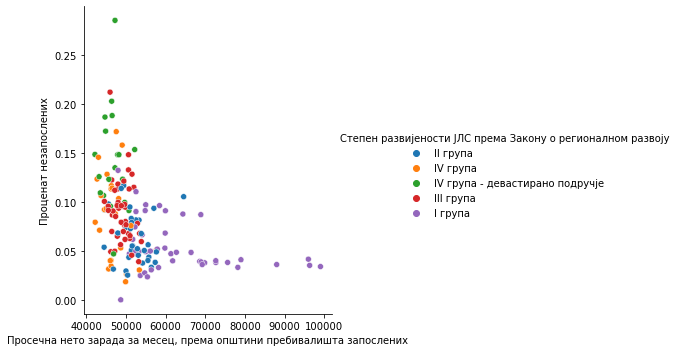

In [33]:
sns.relplot(x="Просечна нето зарада за месец, према општини пребивалишта запослених", 
            y="Проценат незапослених", 
            hue="Степен развијености ЈЛС према Закону о регионалном развоју",
            data=pivopps);

Ovaj grafikon izgleda prilično ubedljivo. Jasno vidimo kakva je veza između zarada i broja nezaposlenih i kako ona izgleda po stepenu razvijenosti opština. Dalju analizu prepuštamo vama.